<img src="InkedInkedpartition.jpg" style="width:512px;height:256px"/>

    Имеем панорманый снимок. Задача создать 8 масштабных проекций каждой из стен. Так как я никогда прежде не сталкивался с подобной задачей, а референсные решения казались непосильными для осознания, я накидал примерный алгоритм как это может работать и постарался реализовать его для начала для одной из стен (на рисунке выше она №1):
    1. Вычленить изображение с панорамного снимка;
    2. Путем преобразований привести фрагмент к масштабному изображению стены. 

    Дальше будет код реализации 1 шага. Скажу сразу, 2 шаг так и не был решен.

In [28]:
# импортируем необходимые библиотеки
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# импортируем необходимые исходники
pan = cv2.imread('image_1024_aligned_rgb.png')
v_corners = np.load('v_corners.npy')
h_corners = np.load('h_corners.npy')
dpt_map = np.load('depth_map.npy')

Так как необходимый фрагмент ограничен 4 линиями, нужно лишь их определить их и достать все, что находится внутри. Верхняя и нижняя линии определены, но нужны их обрезать именно для нашего фрагмента. Для этого будем использовать координаты Х вертикальных углов справа и слева стены 1 (используем 'v_corners.npy'). Округлив, они равны 31 и 363, а значит длина нашего фрагмента по оси Х равна 333 пикселя. Создадим матрицe соответcтвующей размерности и заполним ее данными горизонтальных углов.

In [30]:
arup = np.ones((333, 2))
ardn = np.ones((333, 2))

arup[:, 0] = np.arange(31, 364)
ardn[:, 0] = np.arange(31, 364)

arup[:, 1] = np.round(h_corners[0][30:363])
ardn[:, 1] = np.round(h_corners[1][30:363])
# Вынужден привести формат к инту, поскольку cv2.polylines дальше принимает только такой формат
arup = np.array(arup, dtype=np.int32)
ardn = np.array(ardn, dtype=np.int32)

ardn = ardn[::-1, :]
# Объединим верхнюю и нижнюю вместе
fr1 = np.vstack((arup,  ardn))

In [31]:
# строим границу фрагмента
poly_rnd = cv2.polylines(pan, [fr1], isClosed=False, color=(0, 0, 0), thickness=1, lineType=cv2.LINE_AA)

In [45]:
mask = np.zeros_like(pan)
cv2.fillPoly(mask, [fr1], (255, 255, 255))
# Получаем маску и применяем ее к исходнику
result = cv2.bitwise_and(pan, mask)

In [48]:
# Убираем ненужные черные пиксели
non_zero_pxls = np.argwhere(result != 0)
non_zero_pxls_xy = non_zero_pxls[:, 0:2]

min_x = non_zero_pxls_xy[:, 0].min()
max_x = non_zero_pxls_xy[:, 0].max()
min_y = non_zero_pxls_xy[:, 1].min()
max_y = non_zero_pxls_xy[:, 1].max()

crop_result = result[min_x:max_x + 1, min_y:max_y + 1]

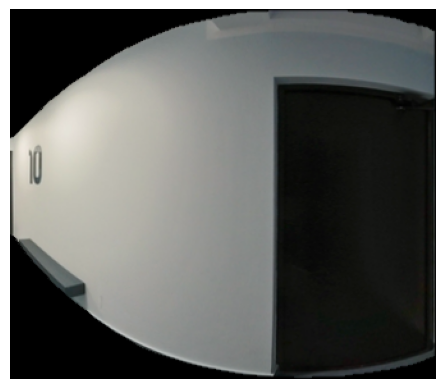

In [52]:
#Вывод изображения фрагмента
plt.imshow(crop_result)
plt.axis('off')
plt.show()

И на этом первая часть закончена. Вторую часть выполнить на момент 10-го дня я не смог. Впрочем, используя, например, проект HorizonNet (https://github.com/sunset1995/HorizonNet) я смог получить 3d-модель помещения.

<img src="visualise.jpg" style="width:440px;height:282px"/>

HorizonNet отработал некорректно, "скушал" две стены, но нашу (№1) стену в 2д формате мы наблюдаем, а значит путем деконструкции кода Horizon рано или поздно задачу решить можно. Возможно даже не используя код из шага 1, но тем не менее. 
      
   В аннотации к отклику на hh.ru Вы указали "попробуйте решить задачу для предметного разговора". 
Вам судить насколько близко я приблизился к решению задачи и насколько оптимальным был мой путь ее решения. Если всего вышеперечисленного достаточно, да и просто потому чем занимается Ваша компания, буду очень рад предметно пообщаться. Мне было очень интересно решать эту задачу, а еще интереснее было знакомиться с миром ML по пути. Захватывающе.